# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


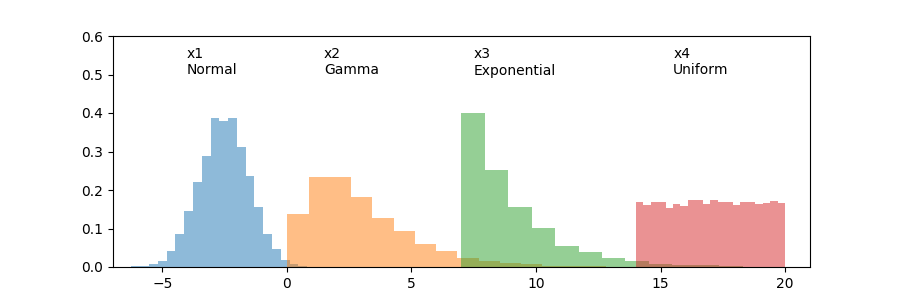

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))

plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


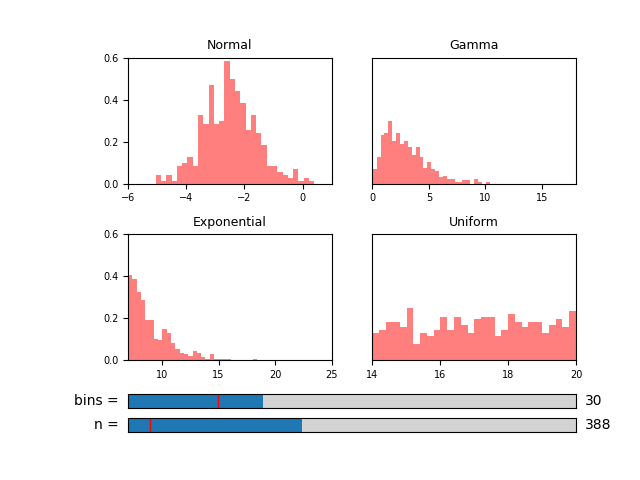

0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.animation as animation
from matplotlib.widgets import Slider

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

n0=50
b0=20

def update_chart_junk():
    # Set appropriate x and y axis ranges for each plot
    ax1.axis([-6,1,0,0.6])
    ax2.axis([0,18,0,0.6])
    ax3.axis([7,25,0,0.6])
    ax4.axis([14,20,0,0.6])
    
    # Add titles
    ax1.set_title('Normal', fontsize=9)
    ax2.set_title('Gamma', fontsize=9)
    ax3.set_title('Exponential', fontsize=9)
    ax4.set_title('Uniform', fontsize=9)
    
    # Adjust axis font size
    for ax in [ax1,ax2,ax3,ax4]:
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(7)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(7)

    # Remove y-axis for subplots 2 and 4
    for ax in [ax2,ax4]:
        ax.get_yaxis().set_visible(False)

# Create a figure with 4 subplots
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2)
fig.subplots_adjust(left=0.2, bottom=0.25, hspace=0.4)
update_chart_junk()

# Update the histograms when the sliders are changed
def s_update(val):
    # Retrieve new values
    n = math.trunc(slider_n.val)
    b = math.trunc(slider_b.val)
    
    # Clear current plots
    for ax in [ax1, ax2, ax3, ax4]:
        ax.cla()
    
    # Plot histograms using new n and b values
    ax1.hist(x1[:n], normed=True, bins=b, alpha=0.5, color='red')
    ax2.hist(x2[:n], normed=True, bins=b, alpha=0.5, color='red')
    ax3.hist(x3[:n], normed=True, bins=b, alpha=0.5, color='red')
    ax4.hist(x4[:n], normed=True, bins=b, alpha=0.5, color='red')
    
    update_chart_junk()
    fig.canvas.draw_idle()
    
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n0: 
        a.event_source.stop()

    # Clear current plots
    for ax in [ax1, ax2, ax3, ax4]:
        ax.cla()
    
    update_chart_junk()
    
    # Plot histograms
    top_left = ax1.hist(x1[:curr], normed=True, bins=b0, alpha=0.5, color='red')
    top_right = ax2.hist(x2[:curr], normed=True, bins=b0, alpha=0.5, color='red')
    bottom_left = ax3.hist(x3[:curr], normed=True, bins=b0, alpha=0.5, color='red')
    bottom_right = ax4.hist(x4[:curr], normed=True, bins=b0, alpha=0.5, color='red')

# Start animation
a = animation.FuncAnimation(fig, update, interval=10)

# Create the n slider
axcolor = "lightgray"
ax_n = plt.axes([0.2, 0.1, .7, 0.03], facecolor=axcolor)
ax_n.set_yticks([])
slider_n = Slider(ax_n, 'n =', 0, 1000, valinit=n0, valfmt="%i")

# Create the bins slider
ax_b = plt.axes([0.2, 0.15, .7, 0.03], facecolor=axcolor)
ax_b.set_yticks([])
slider_b = Slider(ax_b, 'bins =', 0, 100, valinit=b0, valfmt="%i")

# Update when sliders changed
slider_n.on_changed(s_update)
slider_b.on_changed(s_update)